In [73]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter

In [74]:

def visualize(arr: np.array, cmap: str = "viridis", flip: bool = False):
    img = np.copy(arr)
    img = img - img.min()
    img = img / img.max()
    plt.imshow(img, cmap=cmap, origin="upper")


def magnitude2(arrX: np.array, arrY: np.array):
    return np.sqrt(arrX**2 + arrY**2)


def interp2d(a, x, y):
    X = np.floor(x).astype(int)
    Y = np.floor(y).astype(int)
    fracX = x - X
    fracY = y - Y
    X = np.clip(X, 0, a.shape[0] - 2)
    Y = np.clip(Y, 0, a.shape[1] - 2)


    U1 = (1.0 - fracX) * a[X + 0, Y + 0] + fracX * a[X + 1, Y + 0]
    U2 = (1.0 - fracX) * a[X + 0, Y + 1] + fracX * a[X + 1, Y + 1]
    U = (1.0 - fracY) * U1 + fracY * U2
    return U



In [75]:
d1 = h5py.File("../isabel_2d.h5", "r")
u = np.array(d1["Velocity"]["X-comp"])
v = np.array(d1["Velocity"]["Y-comp"])
img = np.array([u, v, np.zeros_like(u)])

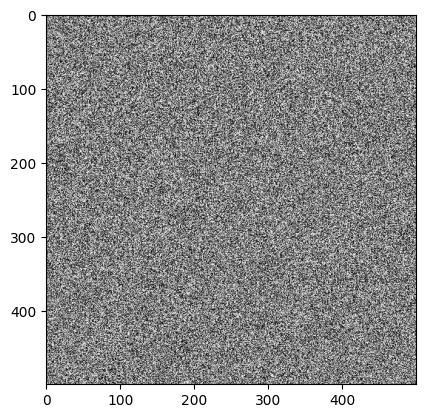

In [ ]:

mesh_size = u.shape[0]

# generate noise texture
n = np.random.random(u.shape)
lic_result = np.zeros(u.shape)

# perform LIC
l = 10
dt = 0.3 / np.max(magnitude2(u, v))
h = np.exp(-np.linspace(-2, 2, l)**2)  

h /= h.sum()
kernel_magnitude = sum(h)
visualize(n, cmap='grey')

In [77]:
for i in range(mesh_size):
    for j in range(mesh_size):
        F_ij = 0
        F_ij = h[0] * n[i, j]

        # fwd
        pos_x, pos_y = i, j
        for k in range(1, l):  
            tmp_x = pos_x
            pos_x += interp2d(u, pos_x, pos_y) * dt
            pos_y += interp2d(v, tmp_x, pos_y) * dt
            F_ij += h[k] * interp2d(n, pos_x, pos_y)

        pos_x, pos_y = i, j
        for k in range(1, l):  
            tmp_x = pos_x
            pos_x -= interp2d(u, pos_x, pos_y) * dt
            pos_y -= interp2d(v, tmp_x, pos_y) * dt
            F_ij += h[k] * interp2d(n, pos_x, pos_y)

        F_ij /= (2*kernel_magnitude) 
        lic_result[i, j] = F_ij
    print(f"{i}/{mesh_size}")

0/500
1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/50

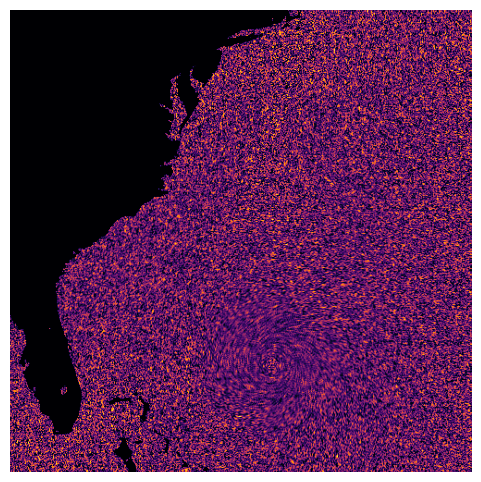

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, u.shape[0])
ax.set_ylim(0, u.shape[0])
ax.set_facecolor("black")


plt.axis('off')

# normalize lic result
lic_result_proc = np.copy(lic_result)
lic_result_proc[magnitude2(u, v) < 0.01] = 0.0
lic_result_proc -= lic_result_proc.min()
lic_result_proc /= lic_result_proc.max()


visualize(np.rot90(lic_result_proc.T)**2, cmap='inferno')

plt.show()

In [79]:
lic_result_proc.max()

np.float64(1.0)